# Part 2.8: Supervised Learning - Logistic Regression

Despite its name, Logistic Regression is a **classification** algorithm, not a regression one. It's one of the most fundamental classification algorithms, used to predict a binary outcome (e.g., yes/no, 0/1, true/false).

### The Sigmoid Function
Logistic Regression works by passing the output of a linear equation through the **Sigmoid function** (or logistic function). The Sigmoid function squashes any real-valued number into a range between 0 and 1, which can be interpreted as a probability.

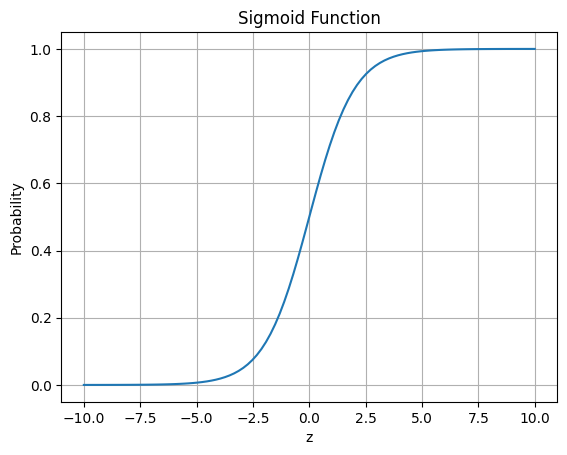

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Plot the sigmoid function
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))
plt.plot(z, sigmoid)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

### Training a Logistic Regression Model

In [2]:
# Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Scale features and split data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

print(f"Accuracy on test set: {log_reg.score(X_test, y_test):.4f}")

Accuracy on test set: 0.9500


### Visualizing the Decision Boundary
The decision boundary is the line or surface that separates the classes. For logistic regression, this boundary is linear.

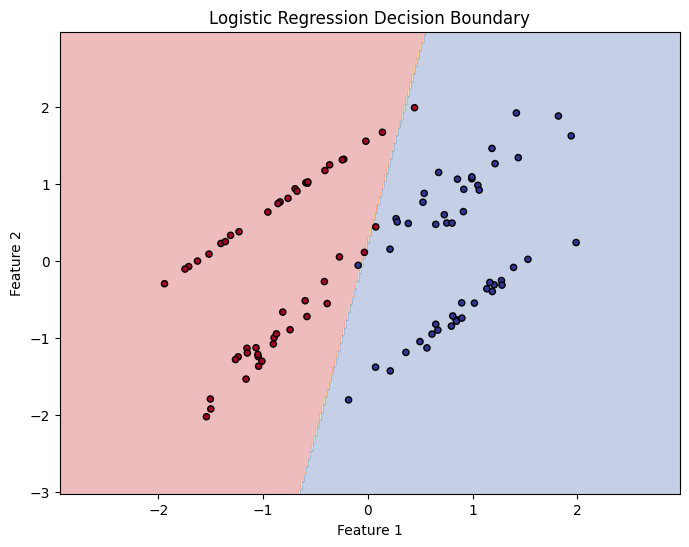

In [3]:
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.figure(figsize=(8, 6))
plot_decision_boundary(log_reg, X_scaled, y)
plt.show()